In [1]:
#recommender

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import preprocessing

data = pd.read_csv("diabetes.csv") 
data.head()

data = data.drop(['BloodPressure', 'SkinThickness', 'Insulin', 'Age'], axis=1) #Rec FS

diabetes_mod = data[(data.BMI != 0) & (data.Glucose != 0)]
data = diabetes_mod

data.head()

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,33.6,0.627,1
1,1,85,26.6,0.351,0
2,8,183,23.3,0.672,1
3,1,89,28.1,0.167,0
4,0,137,43.1,2.288,1


In [3]:
X = data.drop(['Outcome'], axis=1).values
y = data['Outcome'].values

scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)

X

array([[0.35294118, 0.67096774, 0.31492843, 0.23441503],
       [0.05882353, 0.26451613, 0.17177914, 0.11656704],
       [0.47058824, 0.89677419, 0.10429448, 0.25362938],
       ...,
       [0.29411765, 0.49677419, 0.16359918, 0.07130658],
       [0.05882353, 0.52903226, 0.24335378, 0.11571307],
       [0.05882353, 0.31612903, 0.24948875, 0.10119556]])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [5]:
'''
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(pca.explained_variance_ratio_)
print('PCA sum: {:.2f}%'.format(sum(pca.explained_variance_ratio_) * 100))
'''

"\nfrom sklearn.decomposition import PCA\n\npca = PCA(n_components=2)\n\nX_train = pca.fit_transform(X_train)\nX_test = pca.transform(X_test)\n\nprint(pca.explained_variance_ratio_)\nprint('PCA sum: {:.2f}%'.format(sum(pca.explained_variance_ratio_) * 100))\n"

In [6]:
from scipy.spatial.distance import pdist, squareform

matrix = squareform(1/pdist(X, metric='euclidean'))#.reshape((len(X), len(y_train))
matrix

array([[ 0.        ,  1.86960647,  3.02108965, ...,  3.46461772,
         2.81870294,  2.06528062],
       [ 1.86960647,  0.        ,  1.29898538, ...,  2.99580437,
         3.64923548, 10.57685514],
       [ 3.02108965,  1.29898538,  0.        , ...,  2.09472657,
         1.70711436,  1.3471555 ],
       ...,
       [ 3.46461772,  2.99580437,  2.09472657, ...,  0.        ,
         3.93029303,  3.22301786],
       [ 2.81870294,  3.64923548,  1.70711436, ...,  3.93029303,
         0.        ,  4.68415268],
       [ 2.06528062, 10.57685514,  1.3471555 , ...,  3.22301786,
         4.68415268,  0.        ]])

In [7]:
#matrix = [[1 - x for x in row] for row in matrix]

for i in range(len(X)):
    for j in range(len(X_train)):
        if i != j:
            if (y_train[j] == 0.0):
                matrix[i][j] = 0.0 - matrix[i][j]


In [8]:
matrix

array([[ 0.        ,  1.86960647, -3.02108965, ...,  3.46461772,
         2.81870294,  2.06528062],
       [-1.86960647,  0.        , -1.29898538, ...,  2.99580437,
         3.64923548, 10.57685514],
       [-3.02108965,  1.29898538,  0.        , ...,  2.09472657,
         1.70711436,  1.3471555 ],
       ...,
       [-3.46461772,  2.99580437, -2.09472657, ...,  0.        ,
         3.93029303,  3.22301786],
       [-2.81870294,  3.64923548, -1.70711436, ...,  3.93029303,
         0.        ,  4.68415268],
       [-2.06528062, 10.57685514, -1.3471555 , ...,  3.22301786,
         4.68415268,  0.        ]])

In [9]:
predictions = []

for i in range(len(X_train), len(X)):
    p = matrix[i][0:len(X_train)]
    p_neg = [x for x in p if x<0] 
    p_pos = [x for x in p if x>0]
    print(sum(p_neg)/len(p_neg))
    print(sum(p_pos)/len(p_pos))
    if (sum(p_neg)/len(p_neg) + sum(p_pos)/len(p_pos)) > 0:
        predictions.append(1)
    else:
        predictions.append(0)
 

-2.3065253196735
2.380724116739818
-2.893185436159142
2.9693689243620955
-1.595373769596947
1.5680810011560655
-2.4966576521154047
2.5725654602059795
-2.5989297753882137
2.359192523150287
-3.576733391094523
3.845252263359583
-2.479794687981985
2.5404433273085636
-3.371116055298123
3.642930739088917
-3.089959160770557
2.768950243539562
-2.818092924715007
2.5744998325894937
-3.3352484791744823
3.371391754914703
-3.3239961608932043
3.3088667806293084
-2.966194065004511
2.963746724776163
-3.300255625432673
3.543866587928373
-2.4406415254718077
2.315668646109985
-2.360106196797905
2.263132430823622
-3.104871593749525
2.9574665134407736
-2.0059681911950187
1.929988422977613
-3.4161495042803973
3.926871500279799
-3.2112748862060516
3.079104953774141
-1.9432945327342441
1.8249924077381492
-2.8609450994212704
2.8053850137511813
-2.7529585175262423
2.804324809526189
-2.4679073815931716
2.3826057510574565
-3.463360850970185
3.743955501699912
-2.0479081264140944
1.9736930893652982
-2.7294261520630

In [14]:
#TOP-K

predictions = []

for i in range(len(X_train), len(X)):
    p = matrix[i][0:len(X_train)]
    topk = sorted(p, reverse=True, key=abs)[:15]
    p_neg = [x for x in topk if x<0] 
    p_pos = [x for x in topk if x>0]
    #print(len(p_pos) - len(p_neg))
    if (len(p_pos) - len(p_neg)) >= 0:
        predictions.append(1)
    else:
        predictions.append(0)  
    

In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("#0: ",predictions.count(0))
print("#1: ", predictions.count(1))

Accuracy: 68.27%
#0:  212
#1:  37


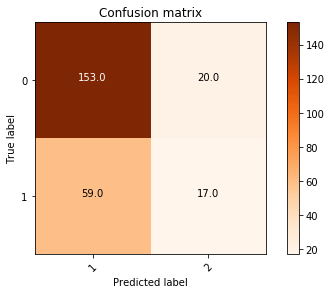

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Oranges):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(cm.shape[1])
    plt.xticks(tick_marks, rotation=45)
    ax = plt.gca()
    ax.set_xticklabels((ax.get_xticks() +1).astype(str))
    plt.yticks(tick_marks)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.1f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, predictions)
plt.figure()
plot_confusion_matrix(cnf_matrix, title='Confusion matrix')

# ML

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"
        ]

classifiers = [
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    GaussianProcessClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

In [40]:
from sklearn.model_selection import cross_val_score

# iterate over classifiers
results = {}
for name, clf in zip(names, classifiers):
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    results[name] = scores
    
for name, scores in results.items():
    print("%20s | Accuracy: %0.2f%% (+/- %0.2f%%)" % (name, 100*scores.mean(), 100*scores.std() * 2))

   Nearest Neighbors | Accuracy: 76.53% (+/- 6.10%)
          Linear SVM | Accuracy: 77.54% (+/- 6.39%)
             RBF SVM | Accuracy: 77.34% (+/- 5.29%)
    Gaussian Process | Accuracy: 77.34% (+/- 5.69%)
       Decision Tree | Accuracy: 71.38% (+/- 9.92%)
       Random Forest | Accuracy: 79.13% (+/- 5.47%)
          Neural Net | Accuracy: 71.77% (+/- 10.20%)
            AdaBoost | Accuracy: 76.75% (+/- 5.85%)
         Naive Bayes | Accuracy: 78.93% (+/- 7.67%)
                 QDA | Accuracy: 78.52% (+/- 6.80%)
